In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
titanic = pd.read_csv('datasets/titanic.csv')

In [3]:
titanic.head()
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [4]:
print(titanic.shape)

(418, 12)


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
y=titanic['Survived']
x=titanic[['Pclass', 'Fare','Age','SibSp','Parch']] # we can remove sibsp and parch both feature because it does not affect the result.

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [9]:
y_train

336    0
31     0
84     0
287    0
317    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Survived, Length: 334, dtype: int64

In [10]:
y_test

321    0
324    1
388    0
56     0
153    1
      ..
57     0
126    0
24     1
17     0
66     1
Name: Survived, Length: 84, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scale = StandardScaler()

In [13]:
scale.fit(x_train)
scale.fit(x_test)

StandardScaler()

In [14]:
scale.mean_

array([ 2.25      , 30.54518571, 30.76174125,  0.35714286,  0.3452381 ])

In [15]:
scaled_train = scale.transform(x_train)
scaled_test = scale.transform(x_test)

In [16]:
scaled_train

array([[-0.30151134, -0.38050042,  0.11086347, -0.53605627, -0.30308806],
       [-0.30151134,  0.02070695, -0.60539052,  2.46585883, -0.30308806],
       [-0.30151134, -0.43020025, -0.04379453, -0.53605627, -0.30308806],
       ...,
       [-1.50755672,  0.96932815,  1.36430795, -0.53605627, -0.30308806],
       [-0.30151134, -0.36965698, -0.60539052, -0.53605627, -0.30308806],
       [ 0.90453403, -0.49435656, -0.04379453, -0.53605627, -0.30308806]])

In [17]:
y_train.shape

(334,)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()
clf.fit(scaled_train,y_train)

LogisticRegression()

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [21]:
prediction_survival = clf.predict(scaled_test)

In [22]:
print(clf.score(x_test,y_test)*100)

54.761904761904766


### Comparing data before Standardization and after Standardization

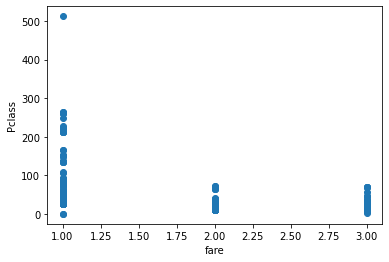

In [23]:
plt.xlabel('fare')
plt.ylabel('Pclass')
plt.plot(titanic['Pclass'],titanic['Fare'],'o')
plt.show()